In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.express as px

In [2]:
sns.set_theme(color_codes=True)
sns.set_style('white')
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
df = pd.read_csv('penguins_size.csv')

df.head()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [9]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

<AxesSubplot:>

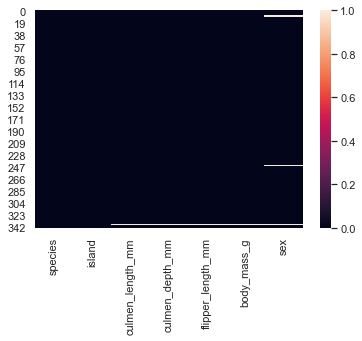

In [10]:
sns.heatmap(df.isnull())

In [11]:
100 * df.isnull().sum() / len(df)

species              0.000000
island               0.000000
culmen_length_mm     0.581395
culmen_depth_mm      0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  2.906977
dtype: float64

<AxesSubplot:>

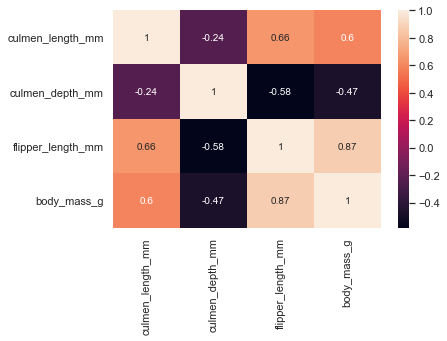

In [12]:
sns.heatmap(df.corr(),annot=True)

In [13]:
df['target_sex'] = df['sex'].map({'MALE': 0 , 'FEMALE' : 1})

In [14]:
df.corr()['target_sex'].sort_values()

body_mass_g         -0.424987
culmen_depth_mm     -0.372673
culmen_length_mm    -0.344078
flipper_length_mm   -0.255169
target_sex           1.000000
Name: target_sex, dtype: float64

In [15]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,target_sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1.0


In [16]:
df = df.dropna()

In [17]:
df = df.drop('target_sex',axis=1)

In [18]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [19]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [20]:
df[df['species']=='Gentoo'].groupby('sex').describe().transpose()

sex                           FEMALE         MALE
culmen_length_mm  count    58.000000    61.000000
                  mean     45.563793    49.473770
                  std       2.051247     2.720594
                  min      40.900000    44.400000
                  25%      43.850000    48.100000
                  50%      45.500000    49.500000
                  75%      46.875000    50.500000
                  max      50.500000    59.600000
culmen_depth_mm   count    58.000000    61.000000
                  mean     14.237931    15.718033
                  std       0.540249     0.741060
                  min      13.100000    14.100000
                  25%      13.800000    15.200000
                  50%      14.250000    15.700000
                  75%      14.600000    16.100000
                  max      15.500000    17.300000
flipper_length_mm count    58.000000    61.000000
                  mean    212.706897   221.540984
                  std       3.897856     5.673252
                  min     203.000000   208.000000
                  25%     210.000000   218.000000
                  50%     212.000000   221.000000
                  75%     215.000000   225.000000
                  max     222.000000   231.000000
body_mass_g       count    58.000000    61.000000
                  mean   4679.741379  5484.836066
                  std     281.578294   313.158596
                  min    3950.000000  4750.000000
                  25%    4462.500000  5300.000000
                  50%    4700.000000  5500.000000
                  75%    4875.000000  5700.000000
                  max    5200.000000  6300.000000

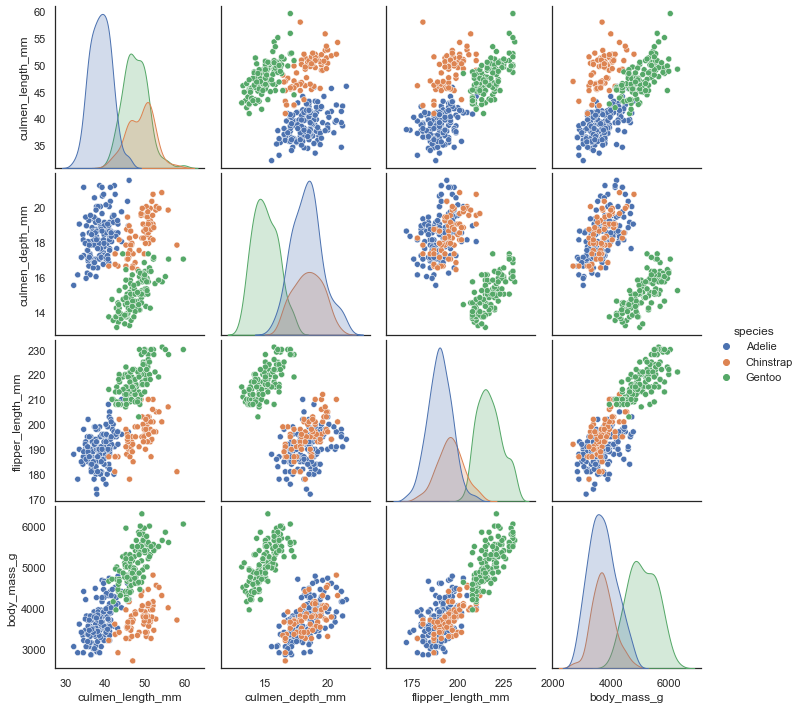

In [21]:
sns.pairplot(data=df, hue='species')

In [22]:
df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [23]:
df['species'].iplot(kind='hist')

In [24]:

fig = px.box(df,x='sex',y='body_mass_g',color='species')
fig.show()

In [25]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [26]:
Island = ['island']

In [27]:
df = pd.get_dummies(df,columns=Island,drop_first=True)

In [28]:
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,MALE,0,1
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE,0,1
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE,0,1
4,Adelie,36.7,19.3,193.0,3450.0,FEMALE,0,1
5,Adelie,39.3,20.6,190.0,3650.0,MALE,0,1


In [29]:
Sex = ['sex']
df = pd.get_dummies(df,columns=Sex,drop_first=True)

In [30]:
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,Adelie,39.1,18.7,181.0,3750.0,0,1,1
1,Adelie,39.5,17.4,186.0,3800.0,0,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,1,0
4,Adelie,36.7,19.3,193.0,3450.0,0,1,0
5,Adelie,39.3,20.6,190.0,3650.0,0,1,1


In [31]:
# we dont need to scale in DT cos we're dealing with a single feature at a time

In [32]:
X = df.drop('species',axis=1)

In [33]:
y = df['species']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
base_model = DecisionTreeClassifier()

In [38]:
base_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [39]:
base_pred = base_model.predict(X_test)

In [40]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [41]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.86      0.95      0.90        40
   Chinstrap       0.92      0.81      0.86        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.92       100
weighted avg       0.92      0.92      0.92       100



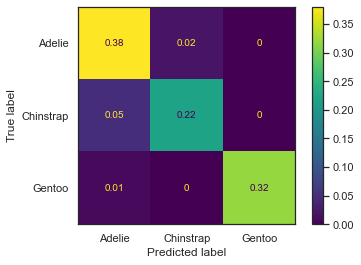

In [42]:
plot_confusion_matrix(base_model,X_test,y_test,normalize='all')

In [43]:
base_model.feature_importances_

array([0.33350103, 0.04582245, 0.58261583, 0.        , 0.03806069,
       0.        , 0.        ])

In [44]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

In [45]:
FI = pd.DataFrame(index=X.columns,data=base_model.feature_importances_
                 ,columns=['Feature Importance']).sort_values('Feature Importance')

In [46]:
FI

,Feature Importance
body_mass_g,0.000000
island_Torgersen,0.000000
sex_MALE,0.000000
island_Dream,0.038061
culmen_depth_mm,0.045822
culmen_length_mm,0.333501
flipper_length_mm,0.582616


In [47]:
from sklearn.tree import plot_tree

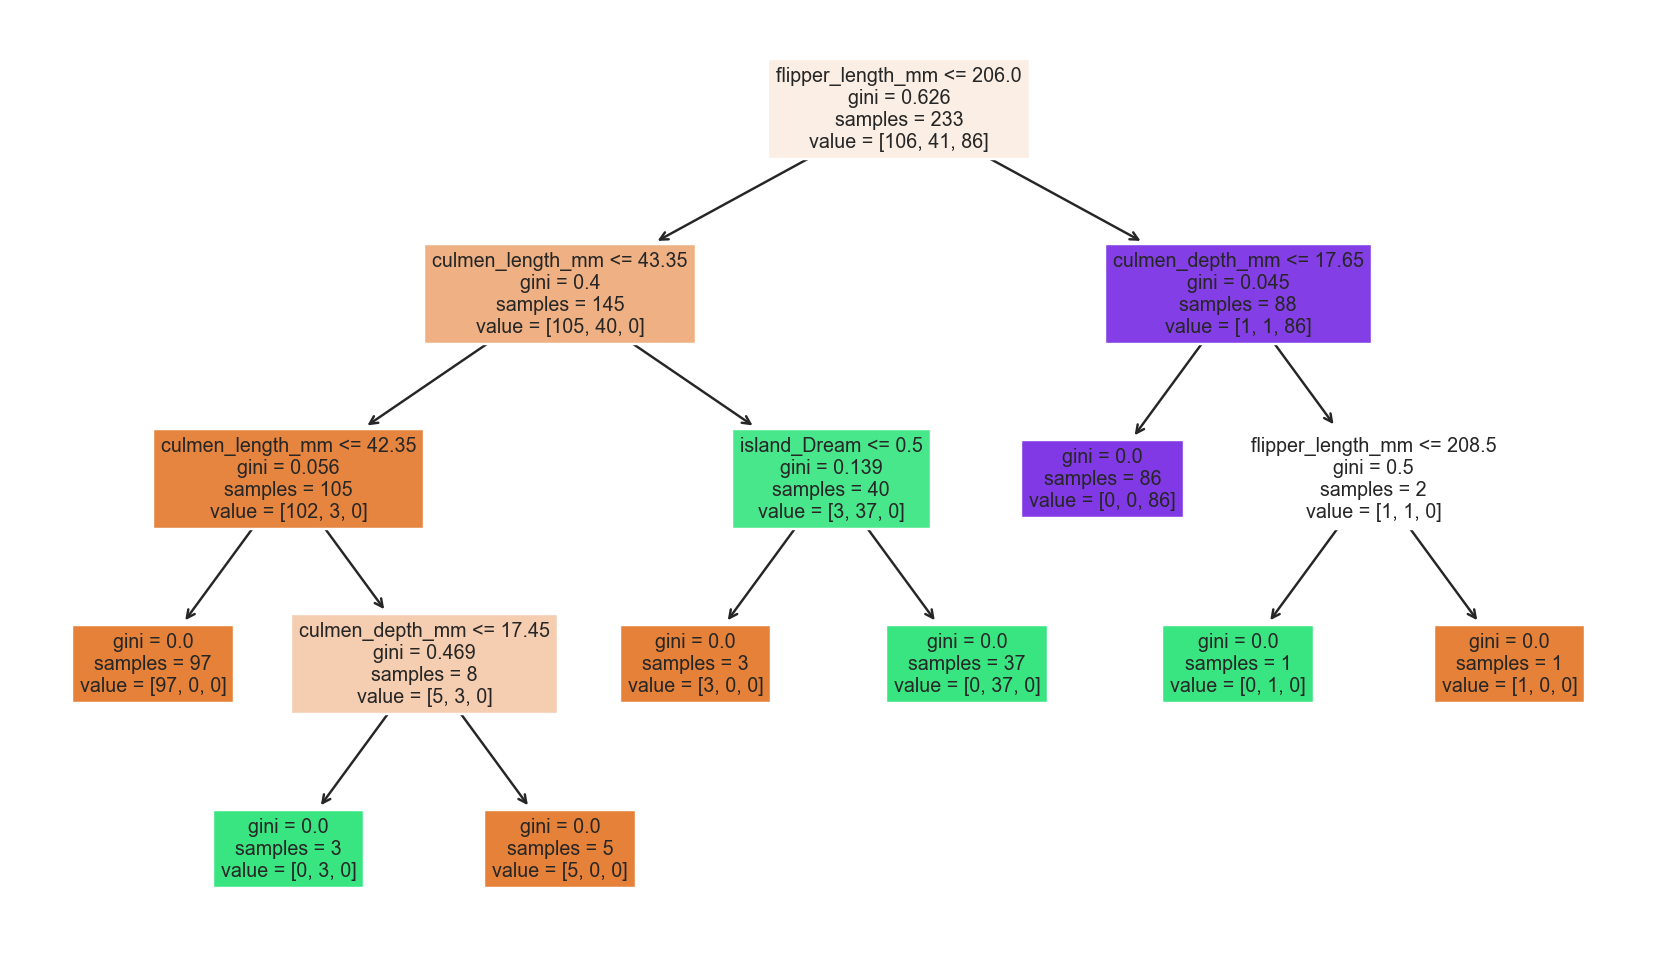

In [48]:
plt.figure(figsize=(12,7),dpi=175)
plot_tree(base_model,feature_names=X.columns,filled=True);

In [49]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,7),dpi=175)
    plot_tree(model,feature_names=X.columns,filled=True);

In [50]:
pruned_tree = DecisionTreeClassifier(max_depth=3)

In [51]:
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

              precision    recall  f1-score   support

      Adelie       0.93      0.95      0.94        40
   Chinstrap       0.93      0.93      0.93        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100





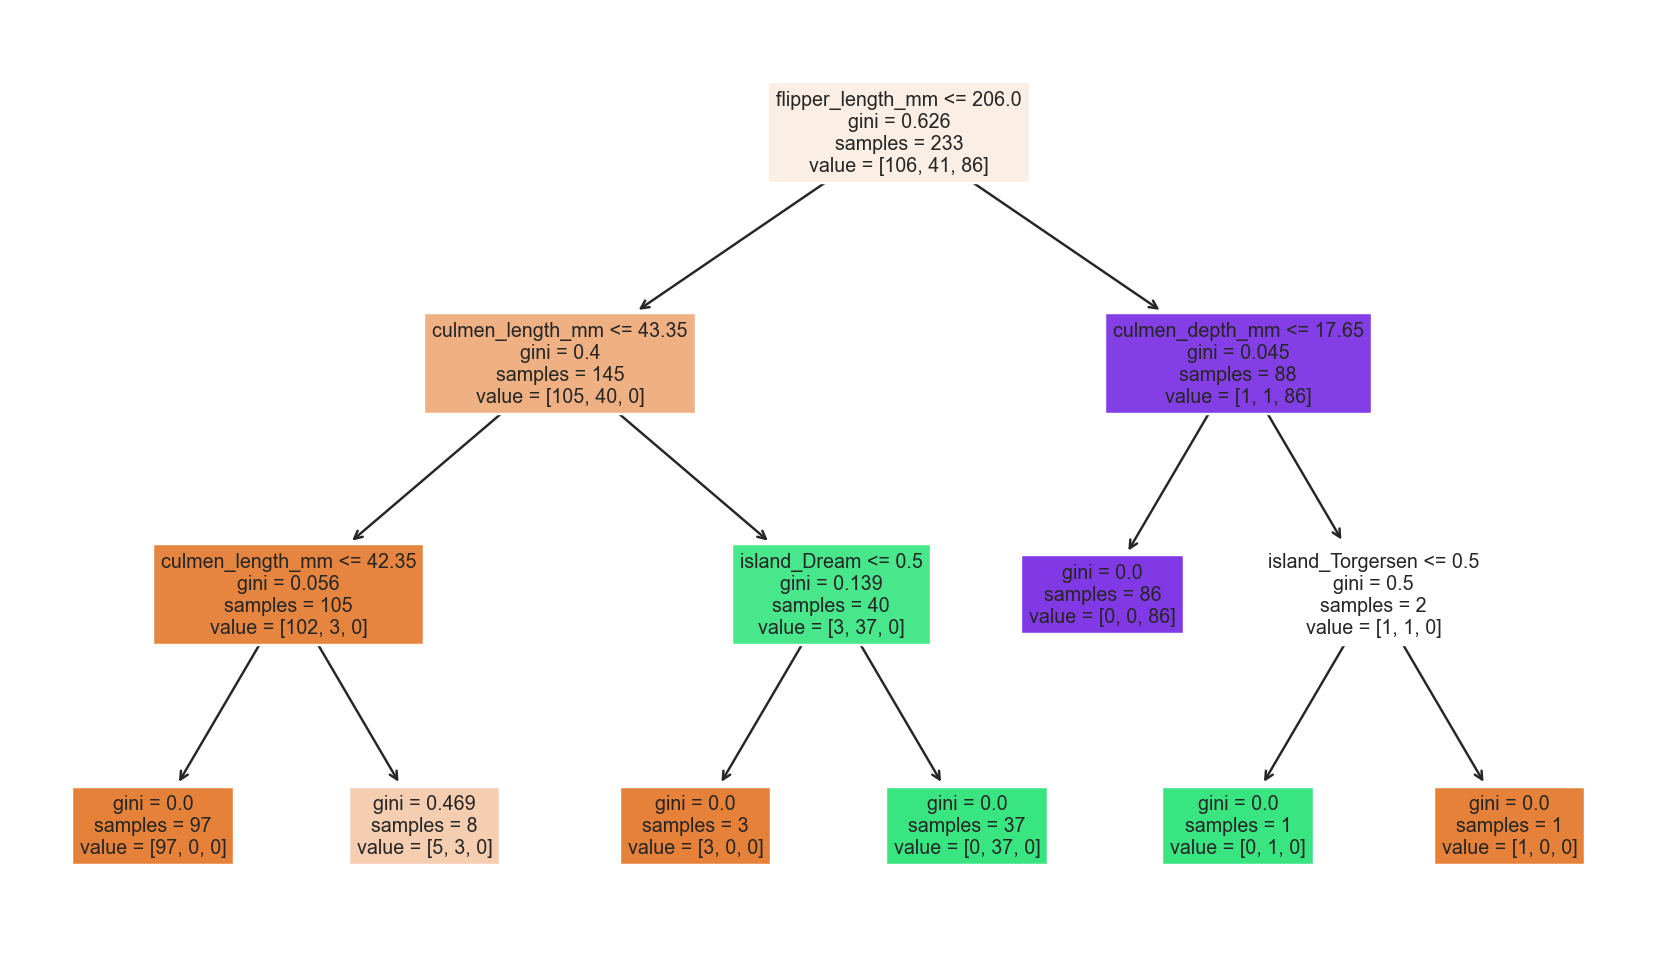

In [52]:
report_model(pruned_tree)

In [53]:
max_leaf_node = DecisionTreeClassifier(max_leaf_nodes=4)

In [54]:
max_leaf_node.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=4)

              precision    recall  f1-score   support

      Adelie       0.93      0.95      0.94        40
   Chinstrap       0.95      0.78      0.86        27
      Gentoo       0.86      0.97      0.91        33

    accuracy                           0.91       100
   macro avg       0.92      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100





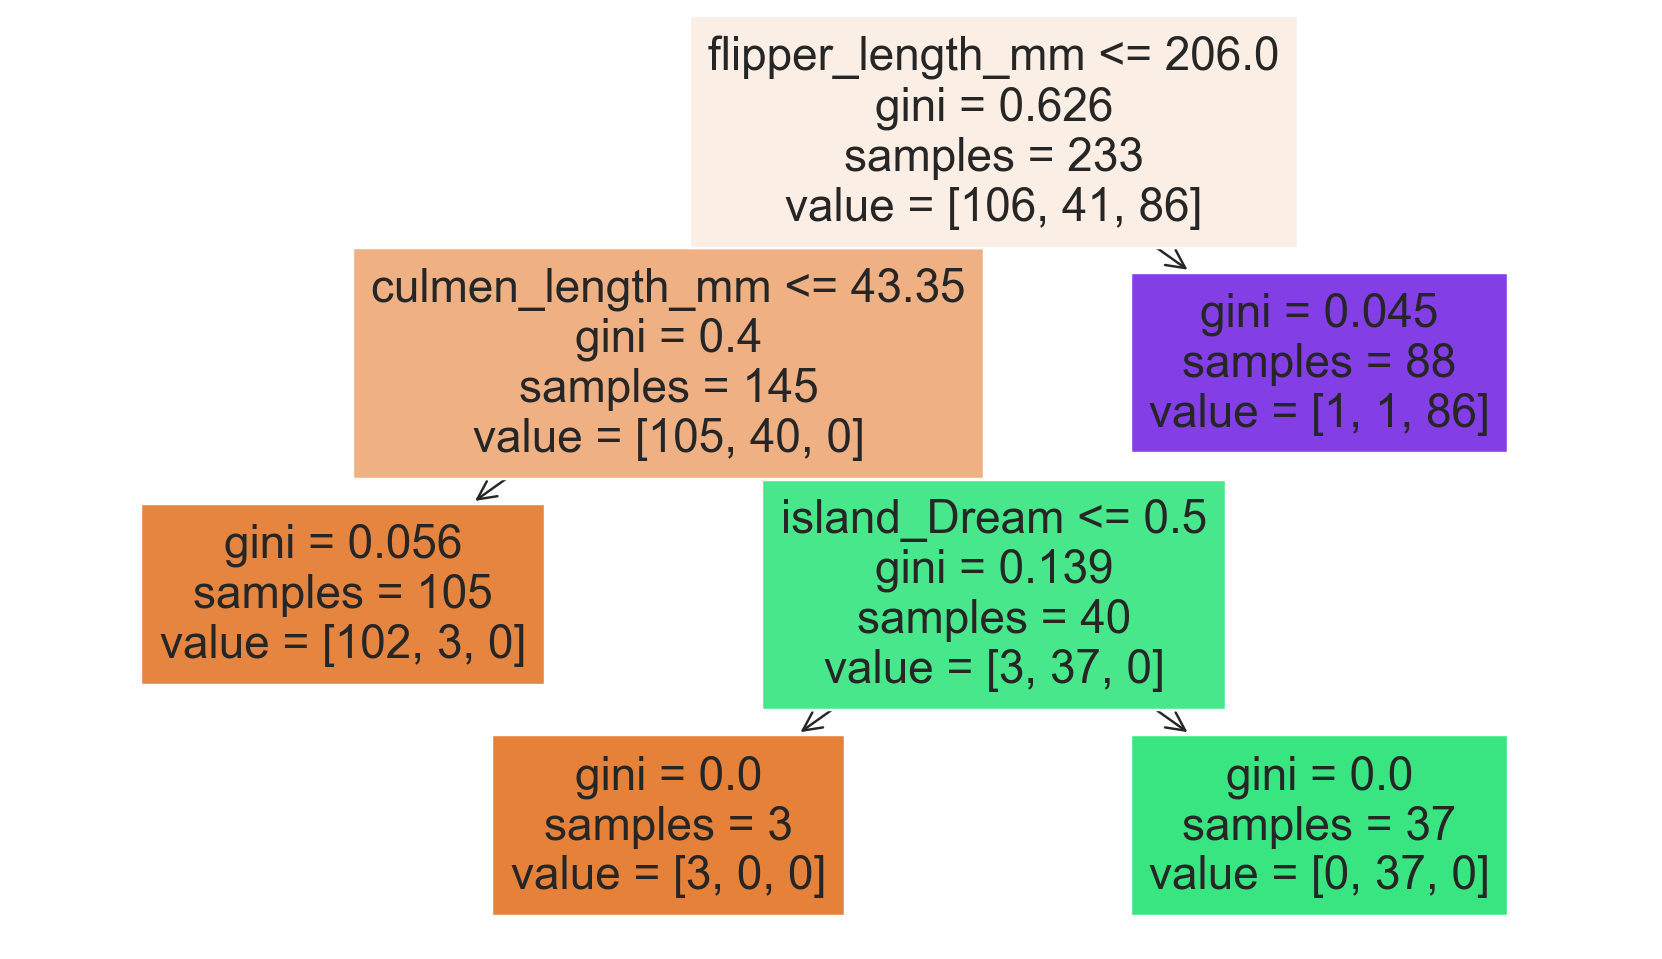

In [55]:
report_model(max_leaf_node)

In [56]:
from sklearn.model_selection import StratifiedKFold

In [57]:
SK = StratifiedKFold()

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
DTmodel = DecisionTreeClassifier(max_depth=3,max_leaf_nodes=4)

In [60]:
criterion = ['gini', 'entropy']
splitter = ['best', 'random']

param_grid = {'criterion':criterion, 'splitter':splitter}

In [61]:
grid_model = GridSearchCV(DTmodel,param_grid,cv=SK,verbose=1)

In [62]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']},
             verbose=1)

In [63]:
grid_model.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [65]:
grid_pred = grid_model.predict(X_test)

In [66]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.96      0.81      0.88        27
      Gentoo       0.86      0.97      0.91        33

    accuracy                           0.92       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



In [67]:
final_model = DecisionTreeClassifier(criterion='entropy',max_depth=3,max_leaf_nodes=4)

In [68]:
final_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=4)

In [69]:
final_pred = final_model.predict(X_test)

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.96      0.81      0.88        27
      Gentoo       0.86      0.97      0.91        33

    accuracy                           0.92       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100





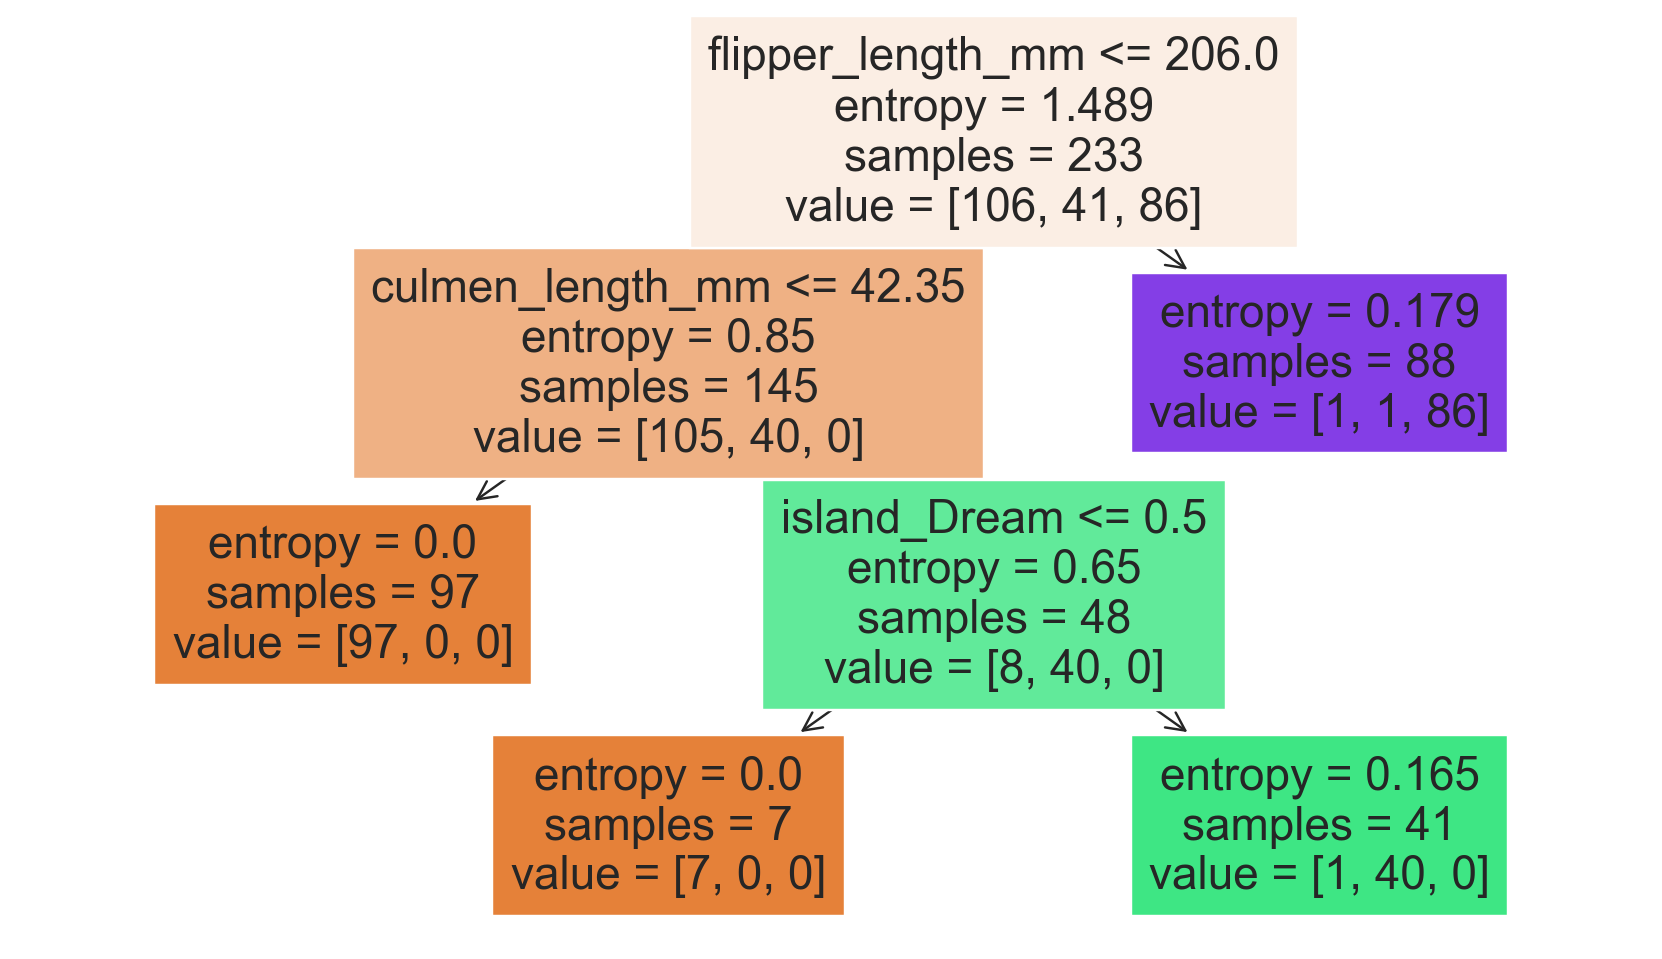

In [70]:
report_model(final_model)